<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-de-Python-BEDU/blob/main/bedu_proyecto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Python Equipo 8


## Introducción

    Asegúrate de empezar con una introducción donde hables acerca del tema que te llamó la atención. Explica por qué quisiste abordar este tema, cuáles fueron tus preguntas iniciales, y el problema que te gustaría resolver.

## Librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import requests

## Colección de Datos

### Obtención de los datos mediante API

El gobierno de México utiliza el sistema de repositorios de datos abiertos [CKAN](https://datos.gob.mx/blog/ckan?category=api-cdn&tag=educacion) para compartir los Datos Abiertos de las dependencias de la Administración Pública Federal, así como de gobiernos locales.

Utilizando la API de CKAN es posible consultar los detalles de los conjuntos de datos que se ofrecen en el portal [datos.gob.mx/busca](https://datos.gob.mx/busca/dataset).

De esta forma, mediante peticiones a esta API podemos obtener la URL del conjunto de datos.

**Realizamos nuestra petición**

El endpoint para consultar datos es:

https://datos.gob.mx/busca/api/3/action/package_search?q=BUSQUEDA 

Por lo que pasaremos el valor **"desaparecidos"** al parametro *q*, para obtener los datasets relacionados.

In [2]:
endpoint = 'https://datos.gob.mx/busca/api/3/action/package_search?'
payload = {'q': 'desaparecidos'}

In [3]:
r = requests.get(endpoint, params=payload)

In [4]:
r.status_code

200

> La petición se ha realizado con éxito

Guardamos el formato *json* obtenido de la petición echa a la API y visualizamos las llaves principales que contiene

In [5]:
json = r.json()
json.keys()

dict_keys(['help', 'success', 'result'])

La llave *'result'* es la que nos interesa, exploraremos su contenido para identificar el conjunto de datos que buscamos.

In [6]:
for key in json['result']['results']:
    print(key['name'])

estadisticas-de-apoyo-y-proteccion-a-detenidos-y-desaparecidos
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-3
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-2
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-1
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-4
cantidad-de-derechohabientes-beneficiados-por-el-programa-integral-de-becas-para-hijos-de-milit


    | El conjunto de datos que buscamos se encuentra en 'registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped' con indice 1.

Ahora buscaremos el conjunto de datos dentro de este diccionario.

In [7]:
for key in json['result']['results'][1]['resources']:
    print(f"Nombre del Dataset: {key['name']} \n{('URL:'):19} {key['url']} \n")

Nombre del Dataset: Base de datos del RNPED del fuero común 
URL:                https://secretariadoejecutivo.gob.mx/transparencia/datos_abiertos/RNPEDFC.csv 

Nombre del Dataset: Base de datos del RNPED del fuero federal 
URL:                https://secretariadoejecutivo.gob.mx/docs/datos_abiertos/RNPEDFF__1.csv 



> Nuestro conjunto de datos es 'Base de datos del RNPED del fuero común' con indice 0.

Guardamos la URL de nuestro conjunto

In [8]:
url = json['result']['results'][1]['resources'][0]['url']

**Leemos el archivo .csv a partir de la URL.**

En caso de error de conexión por falla del servidor, leemos el dataset directamente de nuestro repostitorio de GitHub.

In [9]:
try:
    raw = pd.read_csv(url, encoding='ISO-8859-1')
except:
    raw = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-de-Python-BEDU/main/RNPEDFC.csv', encoding='ISO-8859-1')

**Guardamos la versión RAW de los datos en fromato csv y leemos el archivo**

In [10]:
raw.to_csv('RNPEDFC.csv', index=False, encoding='ISO-8859-1')

In [11]:
df = pd.read_csv('RNPEDFC.csv', encoding='ISO-8859-1')

**Obtenermos como resultado nuesto data frame principal.**

In [12]:
df

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,2018-04-26,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36261,2018-01-08,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36262,2015-02-02,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36263,2017-08-22,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


## Análisis exploratorio de datos

Primero, obtenemos las dimensiones de nuestro `DataFrame`.

In [13]:
df.shape

(36265, 15)

| Nuestro dataframe tiene 36265 renglones (observaciones), y 15 columnas (variables).

**Veamos cuáles son nuestras variables.**

Usando dtypes podemos listar cada una de nuestras variables junto con su tipo de dato. 

In [14]:
df.dtypes

Fecha en que se le vio por ultima vez        object
Hora en que se le vio por ultima vez         object
Pais en que se le vio por ultima vez         object
Entidad en que se le vio por ultima vez      object
Municipio en que se le vio por ultima vez    object
Localidad en que se le vio por ultima vez    object
Nacionalidad                                 object
Estatura                                     object
Complexion                                   object
Sexo                                         object
Edad                                         object
Descripcion de senas particulares            object
Etnia                                        object
Discapacidad                                 object
Dependencia que envio la informacion         object
dtype: object

> De acuerdo con el resultado de la anterior celda, nuestras 15 variables y sus tipos de datos (por defecto) son:
    
| Nombre de variable | Tipo |
| -----------------  | ---- |
| Fecha en que se le vio por ultima vez        | object |
| Hora en que se le vio por ultima vez         | object |
| Pais en que se le vio por ultima vez         | object |
| Entidad en que se le vio por ultima vez      | object |
| Municipio en que se le vio por ultima vez    | object |
| Localidad en que se le vio por ultima vez    | object |
| Nacionalidad                                 | object |
| Estatura                                     | object |
| Complexion                                   | object |
| Sexo                                         | object |
| Edad                                         | object |
| Descripcion de senas particulares            | object |
| Etnia                                        | object |
| Discapacidad                                 | object |
| Dependencia que envio la informacion         | object |


In [15]:
df.index

RangeIndex(start=0, stop=36265, step=1)

> Del anterior comando, `pandas` nos dice que nuestras observaciones están indizadas por valores numéricos que empiezan desde el 0 y terminan en 36265.

Finalmente, echamos un vistazo a los datos para darnos una mejor idea de cómo está compuesto nuestro `DataFrame` a analizar.

In [16]:
df.head(5)

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO


In [17]:
df.tail(10)

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
36255,2018-04-25,06:30:00,MEXICO,PUEBLA,SAN MARTIN TEXMELUCAN,SAN MARTIN TEXMELUCAN,MEXICANA,1.7,DELGADA,HOMBRE,26,"PECAS EN EL ROSTRO, PERFORACION EN LA ORJA IZQ...",NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36256,2018-04-22,11:30:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.52,DELGADA,MUJER,18,PERFORACION EN LA LENGUA Y MANCHA BLANCA EN ME...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36257,2017-07-02,11:14:59,MEXICO,SONORA,CANANEA,CANANEA,MEXICANA,NO ESPECIFICADO,NO ESPECIFICADO,HOMBRE,NO ESPECIFICADO,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - SONORA
36258,2017-04-06,02:00:00,MEXICO,COLIMA,MANZANILLO,SANTIAGO,MEXICANA,1.71,ROBUSTA,HOMBRE,22,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36259,2018-04-15,06:30:00,MEXICO,COLIMA,COLIMA,COLIMA,MEXICANA,1.59,ROBUSTA,HOMBRE,57,TIENE UNA CICATRIZ EN LA PARTE BAJA DE SU ABDO...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36260,2018-04-26,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36261,2018-01-08,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36262,2015-02-02,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36263,2017-08-22,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36264,2018-04-11,02:00:00,MEXICO,NUEVO LEON,SAN NICOLAS DE LOS GARZA,SAN NICOLAS DE LOS GARZA,MEXICANA,1.6,DELGADA,MUJER,14,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON


> Del vistazo a los últimos 10 valores de nuestro dataset podemos observar que nuestro dataset contiene algunos datos faltantes etiquetados por el valor `NO ESPECIFICADO`. Esto es importante tenerlo en cuenta para nuestra limpieza de datos.

### Explorando columnas

Para la exploración de nuetras columnas crearemos una función a la que le podamos pasar como parámetros el nombre de nuestro dataset y la columna de la cual queramos conocer los diferentes valores posibles que toma.

In [18]:
def val_unicos_col(df, col_name):
    return set(df[col_name])

**Fecha en que se le vio por última vez**

In [19]:
df['Fecha en que se le vio por ultima vez']

0        2012-03-18
1        2007-02-05
2        2009-03-14
3        2006-12-23
4        2008-01-11
            ...    
36260    2018-04-26
36261    2018-01-08
36262    2015-02-02
36263    2017-08-22
36264    2018-04-11
Name: Fecha en que se le vio por ultima vez, Length: 36265, dtype: object

En esta columna podemos observar entre que años se encuentran los registros de desapariciones de nuestro dataset.

In [20]:
years = pd.to_numeric(df['Fecha en que se le vio por ultima vez'].str[:4], errors='coerce')

print(f"Fecha más antigua: {round(years.min())}")
print(f"Fecha más reciente: {round(years.max())}")

Fecha más antigua: 1968
Fecha más reciente: 2018


> Nuestros registros van de 1968 a 2018, esto nos dice que hay registros de personas desaparecidas desde 1968 que hasta la fecha no han podido ser localizadas.

**País en que se le vio por última vez**

¿Será que existe alguna observación para la cual el pais donde se le vió por última vez sea distinto de México?
Para contestar esta incógnita podemos ver si la cantidad de registros que satisfacen que `df['Pais en que se le vio por ultima vez'] != 'MEXICO']` es mayor a 0

In [21]:
len(df.loc[df['Pais en que se le vio por ultima vez'] != 'MEXICO']) > 0

False

> Como la instrucción anterior retornó `False`, entonces el País en el que se le vio por última vez siempre es México.

**Entidad en que se le vio por última vez**

¿Cuáles son todos los posibles valores que puede tomar la variable `Entidad en que se le vio por ultima vez`?

In [22]:
columna = 'Entidad en que se le vio por ultima vez'

val_unicos_col(df, columna)

{'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CAMPECHE',
 'CHIAPAS',
 'CHIHUAHUA',
 'CIUDAD DE MEXICO',
 'COAHUILA DE ZARAGOZA',
 'COLIMA',
 'DURANGO',
 'ESTADO DE MEXICO',
 'GUANAJUATO',
 'GUERRERO',
 'HIDALGO',
 'JALISCO',
 'MICHOACAN',
 'MORELOS',
 'NAYARIT',
 'NO ESPECIFICADO',
 'NUEVO LEON',
 'OAXACA',
 'PUEBLA',
 'QUERETARO',
 'QUINTANA ROO',
 'SAN LUIS POTOSI',
 'SINALOA',
 'SONORA',
 'TABASCO',
 'TAMAULIPAS',
 'TLAXCALA',
 'VERACRUZ',
 'YUCATAN',
 'ZACATECAS'}

> Podemos observar que nuestros dataset contiene registros de los 32 estados de la república mexicana

**Municipio en que se le vio por última vez**

¿Cuáles son todos los posibles valores que puede tomar esta variable?

In [23]:
columna = 'Municipio en que se le vio por ultima vez'

len(val_unicos_col(df, columna))

1068

> Vemos que son muchos los municipios, por lo que mejor preguntamos por la cantidad de municipios únicos. La respuesta a esta pregunta es 1068 municipios únicos.

**Localidad en que se le vio por última vez**

¿Cuáles son todos los posibles valores que puede tomar esta variable?

In [24]:
col_name = 'Localidad en que se le vio por ultima vez'

len(val_unicos_col(df, col_name))

2676

> De nuevo, vemos que son muchas las localidades, por lo que mejor preguntamos por la cantidad de valores únicos que toma la variable. La respuesta a esta pregunta es 2676 localidades únicas.

**Nacionalidad**

Vale la pena preguntarse si la variable Nacionalidad toma valores distintos de MEXICANA.

In [25]:
columna = 'Nacionalidad'

val_unicos_col(df, columna)

{'ALEMANA',
 'ARGENTINA',
 'BRASILEÑA',
 'CANADIENSE',
 'CHINA',
 'COLOMBIANA',
 'COSTARICENSE',
 'CUBANA',
 'DOMINICANA',
 'ERITREA',
 'ESPAÑOLA',
 'ESTADOUNIDENSE',
 'FRANCESA',
 'GUATEMALTECO',
 'HAITIANA',
 'HOLANDESA',
 'HONDUREÑA',
 'ITALIANA',
 'MEXICANA',
 'NICARAGUENSE',
 'NO ESPECIFICADO',
 'PANAMEÑA',
 'PARAGUAYA',
 'PERUANA',
 'SALVADOREÑA',
 'VENEZOLANA'}

> Listando los valores unicos de esta columna podemos afirmar que en efecto la variable Nacionalidad toma valores distintos de MEXICANA.

**Estatura**

Investiguemos cuál es el rango de alturas.

In [26]:
val_unicos_col(df, 'Estatura')

{'0.3',
 '0.35',
 '0.4',
 '0.42',
 '0.45',
 '0.47',
 '0.49',
 '0.5',
 '0.51',
 '0.52',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.57',
 '0.58',
 '0.6',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.65',
 '0.66',
 '0.68',
 '0.7',
 '0.73',
 '0.75',
 '0.76',
 '0.77',
 '0.78',
 '0.8',
 '0.81',
 '0.82',
 '0.83',
 '0.84',
 '0.85',
 '0.86',
 '0.87',
 '0.89',
 '0.9',
 '0.91',
 '0.92',
 '0.93',
 '0.94',
 '0.95',
 '0.96',
 '0.97',
 '0.98',
 '0.99',
 '1',
 '1.01',
 '1.02',
 '1.03',
 '1.04',
 '1.05',
 '1.06',
 '1.07',
 '1.1',
 '1.11',
 '1.13',
 '1.14',
 '1.15',
 '1.16',
 '1.17',
 '1.2',
 '1.21',
 '1.22',
 '1.23',
 '1.25',
 '1.27',
 '1.28',
 '1.29',
 '1.3',
 '1.31',
 '1.32',
 '1.33',
 '1.34',
 '1.35',
 '1.36',
 '1.37',
 '1.38',
 '1.39',
 '1.4',
 '1.41',
 '1.42',
 '1.43',
 '1.44',
 '1.45',
 '1.46',
 '1.47',
 '1.48',
 '1.49',
 '1.5',
 '1.51',
 '1.52',
 '1.53',
 '1.54',
 '1.55',
 '1.56',
 '1.57',
 '1.58',
 '1.59',
 '1.6',
 '1.61',
 '1.62',
 '1.63',
 '1.64',
 '1.65',
 '1.66',
 '1.67',
 '1.68',
 '1.69',
 '1.7',


> Aquí nos encontramos un problema en la forma que se encuentran registradas algunas alturas, hay alturas registradas en centímetros y alturas registradas en metros. Además, identificamos otra forma en la que se registran valores nulos, esta vez como "no ESPECIFICADO".
Entonces esperaremos a responder esta pregunta después de realizar nuestra limpieza y transformación de datos.

**Complexión**

Veamos qué valores únicos puede tomar esta variable.

In [27]:
columna = 'Complexion'

val_unicos_col(df, columna)

{'DELGADA',
 'MEDIANA',
 'NO ESPECIFICADO',
 'No Especificado',
 'OBESA',
 'ROBUSTA'}

> Podemos observar cuatro categorías diferentes registradas en nuestro dataset. Además, identificamos otra forma en la que se registran valores nulos, esta vez como "No Especificado".

**Sexo**

Podemos preguntarnos si el campo Sexo permite el registro de gente no binaria o alguna otra forma de identificación.

In [28]:
columna = 'Sexo'
val_unicos_col(df, columna)

{'HOMBRE', 'MUJER'}

> Observamos que la variable Sexo sólo admite dos valores: HOMBRE y MUJER.

**Edad**

Veamos cuál es el rango de edad.

In [29]:
edad = pd.to_numeric(df['Edad'], errors='coerce')

print(f"Edad menor: {round(edad.min())}")
print(f"Edad mayor: {round(edad.max())}")

Edad menor: 1
Edad mayor: 103


> Entonces, el rango de edad va desde 1 año hasta 103 años.

**Descripción de señas particulares**

In [30]:
df['Descripcion de senas particulares']

0        TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...
1                                          NO ESPECIFICADO
2        MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...
3        LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...
4                                          NO ESPECIFICADO
                               ...                        
36260    LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...
36261    EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...
36262                                      NO ESPECIFICADO
36263    TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...
36264                                      NO ESPECIFICADO
Name: Descripcion de senas particulares, Length: 36265, dtype: object

> Observamos que esta variable contiene campos de texto de distintas longitudes.

**Entnia**

Los valores que toma la variable Etnia son:

In [31]:
columna = 'Etnia'

val_unicos_col(df, columna)

{'AMUZGOS OAXACA',
 'CHATINOS',
 'CHICHIMECAS',
 'CHINANTECOS',
 'CHOLES',
 'HUASTECOS',
 'HUICHOLES',
 'MAMES',
 'MAYAS',
 'MEXICANEROS',
 'MIXTECOS',
 'NAHUAS',
 'NO ESPECIFICADO',
 'OTOMIES',
 'PAMES',
 'SERIS',
 'TARAHUMARAS - RARAMURI',
 'TLALPANECOS',
 'TOTONACAS',
 'YAQUIS'}

**Discapacidad**

Los valores que toma la variable 'Discapacidad' son:

In [32]:
columna = 'Discapacidad'

val_unicos_col(df, columna)

{'AUTISMO', 'NINGUNO', 'NO ESPECIFICADO', 'SINDROME DE DOWN'}

**Dependencia que envió la información**

Finalmente, listemos los valores de nuestra ultima columna.

In [33]:
columna = 'Dependencia que envio la informacion'

val_unicos_col(df, columna)

{'FGE - AGUASCALIENTES',
 'FGE - CAMPECHE',
 'FGE - CHIAPAS',
 'FGE - CHIHUAHUA',
 'FGE - COAHUILA',
 'FGE - DURANGO',
 'FGE - GUERRERO',
 'FGE - JALISCO',
 'FGE - MORELOS',
 'FGE - NAYARIT',
 'FGE - OAXACA',
 'FGE - PUEBLA',
 'FGE - QUERETARO',
 'FGE - QUINTANA ROO',
 'FGE - SAN LUIS POTOSI',
 'FGE - SINALOA',
 'FGE - SONORA',
 'FGE - TABASCO',
 'FGE - VERACRUZ',
 'FGE - YUCATAN',
 'FGE - ZACATECAS',
 'FGJ - ESTADO DE MEXICO',
 'PGJ - BAJA CALIFORNIA',
 'PGJ - BAJA CALIFORNIA SUR',
 'PGJ - CIUDAD DE MEXICO',
 'PGJ - COLIMA',
 'PGJ - GUANAJUATO',
 'PGJ - HIDALGO',
 'PGJ - MICHOACAN',
 'PGJ - NUEVO LEON',
 'PGJ - TAMAULIPAS',
 'PGJ - TLAXCALA'}

> Se muestran las diferentes fiscalías y procuradurías que se encargaron de reportar los registros de desaparición.

### Conclusiones del primer análisis exploratorio de datos

> Nuestro dataset está constituido de 36265 observaciones de 15 variables indizadas del 0 al 36264. Nuestras variables son

| Variable |
| -------  |
| Fecha en que se le vio por ultima vez        |
| Hora en que se le vio por ultima vez         |
| Pais en que se le vio por ultima vez         |
| Entidad en que se le vio por ultima vez      |
| Municipio en que se le vio por ultima vez    |
| Localidad en que se le vio por ultima vez    |
| Nacionalidad                                 |
| Estatura                                     |
| Complexion                                   |
| Sexo                                         |
| Edad                                         |
| Descripcion de senas particulares            |
| Etnia                                        |
| Discapacidad                                 |
| Dependencia que envio la informacion         |

> De una observación preliminar de los primeros y últimos 10 datos podemos observar que el tipo de dato inferido por pandas es erróneo (el tipo de dato inferido para todas las columnas fue `object`).

> La propuesta es la siguiente:

| Variable | Tipo |
| -------  | ---- |
| Fecha en que se le vio por ultima vez        | Fecha con formato 'yyyy-mm-dd' |
| Hora en que se le vio por ultima vez         | Hora con formato 'hh:mm:ss' |
| Pais en que se le vio por ultima vez         | Categórico (`MEXICO`) |
| Entidad en que se le vio por ultima vez      | Categórico (valores de `val_col_entidad`) |
| Municipio en que se le vio por ultima vez    | Categórica (valores de `val_col_municipio`) |
| Localidad en que se le vio por ultima vez    | Categórica (valores de `val_col_localidad`) |
| Nacionalidad                                 | Categórica (valores de `val_col_nacionalidad`) |
| Estatura                                     | Numérico float64 (valores en metros) |
| Complexion                                   | Categórica (`DELGADA`, `MEDIANA`, `NO ESPECIFICADA`, `OBESA`, `ROBUSTA`) |
| Sexo                                         | Categórica (`HOMBRE`, `MUJER`) |
| Edad                                         | Numérico int64 (`1` a `103`) |
| Descripcion de senas particulares            | Object (string) |
| Etnia                                        | Categórica (valores de  `val_col_etnia`)|
| Discapacidad                                 | Categórica (`AUTISMO`, `NINGUNO`, `NO ESPECIFICADO`, `SINDROME DE DOWN`) |
| Dependencia que envio la informacion         | Categórica (valores de `val_col_dependencia`) |

> Nuestro dataframe no cuenta con valores NaN estrictamente, sin embargo, tenemos registros con el valor de 'NO ESPECIFICADO' (en algunas columnas encontramos variaciones de este) por lo que tendremos que tomar esto en cuenta en la siguiente etapa de limpieza.

## Limpieza de datos y agregaciones

    - Explora tu dataset con el fin de encontrar los NaNs que contiene. Piensa en la distribución de NaNs por columna y por fila.
    
    - Piensa cuáles son los procedimientos que puedes aplicar a tus NaNs. ¿Tenemos que eliminar las filas/columnas que tienen esos NaNs? ¿O podríamos rellenar esos NaNs con algún valor de manera que podamos retener esas filas/columnas?
    
    - Limpia tu dataset de manera que no quede ningún NaN.
    
    - Reindexa tu dataset si lo consideras necesario.
    
    - Renombra tus columnas si lo consideras necesario.
    
    - Prueba aplicar agregaciones a tu DataFrame para ver si puedes empezar a responder algunas de las preguntas que te planteaste anteriormente. 
    


### Busqueda de NaNs

In [34]:
df.isna().sum()

Fecha en que se le vio por ultima vez        0
Hora en que se le vio por ultima vez         0
Pais en que se le vio por ultima vez         0
Entidad en que se le vio por ultima vez      0
Municipio en que se le vio por ultima vez    0
Localidad en que se le vio por ultima vez    0
Nacionalidad                                 0
Estatura                                     0
Complexion                                   0
Sexo                                         0
Edad                                         0
Descripcion de senas particulares            0
Etnia                                        0
Discapacidad                                 0
Dependencia que envio la informacion         0
dtype: int64

> Como nos percatamos en el análisis exploratorio, no contamos con valores faltantes indicados como NaN, sin embargo, identificamos que en nuestro dataset la categoría 'NO ESPECIFICADO' y sus variaciones en cuanto a su escritura ('No Especificado',  'no ESPECIFICADO') fungen como registros de valores faltantes.

Vamos a realizar el conteo por columna de las ocurrencias del valor 'NO ESPECIFICADO' (y sus variaciones) indicando el porcentaje que representa el número de faltantes respecto al total de registros en nuestro dataframe. 

In [35]:
print(f'{("Columna"):42} =NO ESPECIFICADO=  Porcentaje\n')
for col in df.columns:
    total = (df[col] == "NO ESPECIFICADO").sum()+(df[col] == "No Especificado").sum()+(df[col] == "no ESPECIFICADO").sum()
    print(f'{(col):42} | {(total):16} {(round((total*100)/df.shape[0], 2)):9}%')

Columna                                    =NO ESPECIFICADO=  Porcentaje

Fecha en que se le vio por ultima vez      |              338      0.93%
Hora en que se le vio por ultima vez       |               16      0.04%
Pais en que se le vio por ultima vez       |                0       0.0%
Entidad en que se le vio por ultima vez    |               29      0.08%
Municipio en que se le vio por ultima vez  |              668      1.84%
Localidad en que se le vio por ultima vez  |             3413      9.41%
Nacionalidad                               |             2040      5.63%
Estatura                                   |            11008     30.35%
Complexion                                 |            11295     31.15%
Sexo                                       |                0       0.0%
Edad                                       |             3156       8.7%
Descripcion de senas particulares          |            18914     52.15%
Etnia                                      |      

> Tenemos columnas con nula presencia de faltantes, poca presencia y algunas columnas en donde la cantidad de faltantes es considerable. Pasemos a tomar decisiones sobre como trabajaremos con los valores faltantes en cada columna.

Primero crearemos una copia de nuestro dataframe original para conservarlo.

In [36]:
df_original = df.copy()

Ahora transformemos todos nuestros valores de 'NO ESPECIFICADO' (y sus variaciones) a NaN

In [37]:
df = df.replace('NO ESPECIFICADO',np.NaN)
df = df.replace('No Especificado',np.NaN)
df = df.replace('no ESPECIFICADO',np.NaN)

In [38]:
df.isna().sum()

Fecha en que se le vio por ultima vez          338
Hora en que se le vio por ultima vez            16
Pais en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez         29
Municipio en que se le vio por ultima vez      668
Localidad en que se le vio por ultima vez     3413
Nacionalidad                                  2040
Estatura                                     11008
Complexion                                   11295
Sexo                                             0
Edad                                          3156
Descripcion de senas particulares            18914
Etnia                                        36133
Discapacidad                                  1047
Dependencia que envio la informacion             0
dtype: int64

> Podemos ver que el conteo de faltantes coincide con el que realizamos previamente.

### Limpiando NaNs

**Fecha en que se le vio por ultima vez**

La variable que registra la fecha en la que se vio por última vez a una persona es una variable muy importante en nuestro conjunto de datos y en el contexto del problema. Rellenar esta variable con algún tipo de dato puede hacer que el valor asignado pierda sentido o generar información errónea acerca del problema. Por esto eliminaremos los registros que contengan valores faltantes en esta columna.

In [39]:
df = df.dropna(subset=['Fecha en que se le vio por ultima vez'])

In [40]:
df.isna().sum()

Fecha en que se le vio por ultima vez            0
Hora en que se le vio por ultima vez             0
Pais en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez         26
Municipio en que se le vio por ultima vez      635
Localidad en que se le vio por ultima vez     3345
Nacionalidad                                  2028
Estatura                                     10784
Complexion                                   11157
Sexo                                             0
Edad                                          3088
Descripcion de senas particulares            18704
Etnia                                        35795
Discapacidad                                  1043
Dependencia que envio la informacion             0
dtype: int64

> Observamos que con las filas eliminadas a partir de los faltantes en las fechas, también eliminamos los registros faltantes en 'Hora en que se le vio por última vez', esto no representa una gran repercusión, pues al igual que la columna de fechas, los registros de horas eran datos importantes que no nos convenía rellenar y manipular.

**Entidad en que se le vio por ultima vez**

Esta columna contiene el estado de la república en el que se vio por última vez a la persona desaparecida, la cantidad de faltantes es pequeña y no representa un gran porcentaje respecto al total de registros. Además, es muy probable que en las filas en donde existan faltantes respecto a esta columna, también encontraremos faltantes en las columnas de 'Municipio en que se le vio por última vez' y 'Localidad en que se le vio por última vez'. Entonces eliminemos las filas con faltantes en esta columna.

In [41]:
df = df.dropna(subset=['Entidad en que se le vio por ultima vez'])

In [42]:
df.isna().sum()

Fecha en que se le vio por ultima vez            0
Hora en que se le vio por ultima vez             0
Pais en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez          0
Municipio en que se le vio por ultima vez      609
Localidad en que se le vio por ultima vez     3319
Nacionalidad                                  2027
Estatura                                     10778
Complexion                                   11150
Sexo                                             0
Edad                                          3084
Descripcion de senas particulares            18690
Etnia                                        35770
Discapacidad                                  1043
Dependencia que envio la informacion             0
dtype: int64

> Como se sospechó, al eliminar los faltantes respecto a la columna de entidad, eliminamos NaNs presentes en las dos columnas relacionadas.

Pasemos a la eliminación de las columnas que no serán necesarias para responder las preguntas que nos realizamos, o bien que no aportan demasiada información.

**Pais en que se le vio por ultima vez**

Esta columna tiene el mismo valor (México) para todos los registros de la lista, por el contexto del problema podemos inferir el porqué de este valor. Podemos eliminar esta columna, pues no representa información relevante.

In [43]:
df = df.drop(columns=['Pais en que se le vio por ultima vez'])

**Etnia**

La columna `Etnia` tiene 36133 registros con el valor “no especificado”, es una cantidad muy grande y posiblemente no nos aporte mucho para un análisis. 

In [44]:
df = df.drop(columns=['Etnia'])

In [45]:
df.columns

Index(['Fecha en que se le vio por ultima vez',
       'Hora en que se le vio por ultima vez',
       'Entidad en que se le vio por ultima vez',
       'Municipio en que se le vio por ultima vez',
       'Localidad en que se le vio por ultima vez', 'Nacionalidad', 'Estatura',
       'Complexion', 'Sexo', 'Edad', 'Descripcion de senas particulares',
       'Discapacidad', 'Dependencia que envio la informacion'],
      dtype='object')

> Las columnas han sido eliminadas correctamente de nuestro dataframe.

Remplazamos los valores faltantes por la media en el caso de columnas numéricas que son relevantes para nuestro análisis. No se eliminan porque reducirían bastante el data frame, y no se remplazan por cero porque sería un valor con un significado incoherente (altura cero es algo que no existe).

**Estatura**

Realizaremos una imputación simple usando la media.

Adelantaremos el proceso de transformación en esta columna para facilitar la imputación. Exploremos nuevamente los valores que toma esta variable.

In [46]:
val_unicos_col(df, 'Estatura')

{'0.3',
 '0.35',
 '0.4',
 '0.42',
 '0.45',
 '0.47',
 '0.49',
 '0.5',
 '0.51',
 '0.52',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.57',
 '0.58',
 '0.6',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.65',
 '0.66',
 '0.68',
 '0.7',
 '0.73',
 '0.75',
 '0.76',
 '0.77',
 '0.78',
 '0.8',
 '0.81',
 '0.82',
 '0.83',
 '0.84',
 '0.85',
 '0.86',
 '0.87',
 '0.89',
 '0.9',
 '0.91',
 '0.92',
 '0.93',
 '0.94',
 '0.95',
 '0.96',
 '0.97',
 '0.98',
 '0.99',
 '1',
 '1.01',
 '1.02',
 '1.03',
 '1.04',
 '1.05',
 '1.06',
 '1.07',
 '1.1',
 '1.11',
 '1.13',
 '1.14',
 '1.15',
 '1.16',
 '1.17',
 '1.2',
 '1.21',
 '1.22',
 '1.23',
 '1.25',
 '1.27',
 '1.28',
 '1.29',
 '1.3',
 '1.31',
 '1.32',
 '1.33',
 '1.34',
 '1.35',
 '1.36',
 '1.37',
 '1.38',
 '1.39',
 '1.4',
 '1.41',
 '1.42',
 '1.43',
 '1.44',
 '1.45',
 '1.46',
 '1.47',
 '1.48',
 '1.49',
 '1.5',
 '1.51',
 '1.52',
 '1.53',
 '1.54',
 '1.55',
 '1.56',
 '1.57',
 '1.58',
 '1.59',
 '1.6',
 '1.61',
 '1.62',
 '1.63',
 '1.64',
 '1.65',
 '1.66',
 '1.67',
 '1.68',
 '1.69',
 '1.7',


> La mayoría de los valores se encuentran en un rango de 0 a 2.04, esto nos dice que se maneja la medición en metros. Sin embargo, encontramos valores superiores a 50, es muy probable que estos estén registrados en centímetros. 

Vamos a convertir nuestros valores a tipo flotante y manejarlos en metros, haciendo la conversión respectiva.

In [47]:
df['Estatura'] = df['Estatura'].astype(float)
df['Estatura'] = df['Estatura'].apply(lambda x: x/100 if (x >= 3) else x)

> Ahora todas nuestras estaturas están representadas en metros.

Pasemos a la imputación usando la media.

In [48]:
estatura_promedio = round(df['Estatura'].mean(), 2)
estatura_promedio

1.64

In [49]:
df['Estatura'] = df['Estatura'].fillna(estatura_promedio)

In [50]:
round(df['Estatura'].mean(), 2)

1.64

In [51]:
df.isna().sum()

Fecha en que se le vio por ultima vez            0
Hora en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez          0
Municipio en que se le vio por ultima vez      609
Localidad en que se le vio por ultima vez     3319
Nacionalidad                                  2027
Estatura                                         0
Complexion                                   11150
Sexo                                             0
Edad                                          3084
Descripcion de senas particulares            18690
Discapacidad                                  1043
Dependencia que envio la informacion             0
dtype: int64

> Nuestros valores faltantes en 'Estatura' han sido remplazados por la media, y la media con los valores remplazados sigue siendo igual a 1.64.

**Edad**

Aplicaremos una transformación similar en nuestra columna de edades, convirtiendo nuestros valores a enteros. 

Pasemos a la imputación usando la mediana.

In [52]:
edad_mediana = df['Edad'].median().astype(int)
edad_mediana

28

In [53]:
df['Edad'] = df['Edad'].fillna(edad_mediana)

In [54]:
df['Edad'].median().astype(int)

28

In [55]:
df["Edad"]= df["Edad"].astype(int)

> Ahora todas nuestras edades están representadas en enteros.

In [56]:
df.isna().sum()

Fecha en que se le vio por ultima vez            0
Hora en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez          0
Municipio en que se le vio por ultima vez      609
Localidad en que se le vio por ultima vez     3319
Nacionalidad                                  2027
Estatura                                         0
Complexion                                   11150
Sexo                                             0
Edad                                             0
Descripcion de senas particulares            18690
Discapacidad                                  1043
Dependencia que envio la informacion             0
dtype: int64

> Nuestros valores faltantes en 'Edad' han sido remplazados por la mediana, y la mediana con los valores remplazados sigue siendo igual a 28.

En las columnas donde los valores faltantes siguen presentes, vele la pena conservar el valor categórico de 'NO ESPECIFICADO'. Regresaremos los valores NaN al valor 'NO ESPECIFICADO' (esta vez sin ninguna variación) en las columnas restantes, esas columnas son:

*   Municipio en que se le vio por ultima vez
*   Localidad en que se le vio por ultima vez
*   Nacionalidad
*   Complexion
*   Descripcion de senas particulares
*   Discapacidad

In [57]:
df = df.fillna('NO ESPECIFICADO')

In [58]:
df.isna().sum()

Fecha en que se le vio por ultima vez        0
Hora en que se le vio por ultima vez         0
Entidad en que se le vio por ultima vez      0
Municipio en que se le vio por ultima vez    0
Localidad en que se le vio por ultima vez    0
Nacionalidad                                 0
Estatura                                     0
Complexion                                   0
Sexo                                         0
Edad                                         0
Descripcion de senas particulares            0
Discapacidad                                 0
Dependencia que envio la informacion         0
dtype: int64

> Hemos limpiado nuestro dataframe de datos faltantes.

Vamos a comprar las dimensiones de nuestro dataframe sin datos faltantes y nuestro dataframe original. 

In [59]:
print(f"Original: {df_original.shape[0]} \nSin NaNs: {df.shape[0]}")
print(f"Registros eliminados: {df_original.shape[0]-df.shape[0]}")
print(f"Porcentaje eliminado: {round(((df_original.shape[0]-df.shape[0])*100)/df_original.shape[0], 3)}%")

Original: 36265 
Sin NaNs: 35901
Registros eliminados: 364
Porcentaje eliminado: 1.004%


> Observamos que eliminamos 364 registros, lo que representa un 1.004% del total original.

### Reindexando

In [60]:
df.tail(2)

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Discapacidad,Dependencia que envio la informacion
36263,2017-08-22,04:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NINGUNO,PGJ - COLIMA
36264,2018-04-11,02:00:00,NUEVO LEON,SAN NICOLAS DE LOS GARZA,SAN NICOLAS DE LOS GARZA,MEXICANA,1.60,DELGADA,MUJER,14,NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON


> Podemos ver que el número de filas ya no coincide con el índice del último registro. 

Vamos a reindexar y después establecer nuestros índices empezando desde 1.

In [61]:
df = df.reset_index(drop=True)

df.index = df.index + 1

In [62]:
df

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Discapacidad,Dependencia que envio la informacion
1,2012-03-18,05:00:00,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.10,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NINGUNO,FGE - SONORA
2,2007-02-05,02:00:26,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.10,DELGADA,MUJER,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2009-03-14,08:30:54,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.10,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NINGUNO,FGJ - ESTADO DE MEXICO
4,2006-12-23,08:00:28,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.10,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NINGUNO,FGJ - ESTADO DE MEXICO
5,2008-01-11,12:00:17,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.10,DELGADA,HOMBRE,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.60,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NINGUNO,FGE - PUEBLA
35898,2018-01-08,11:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.70,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NINGUNO,PGJ - COLIMA
35899,2015-02-02,07:00:00,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
35900,2017-08-22,04:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NINGUNO,PGJ - COLIMA


> Ahora el número de filas ya no coincide con el índice del último registro y la indexación comienza desde 1. 

### Renombrando columnas

In [63]:
df.columns

Index(['Fecha en que se le vio por ultima vez',
       'Hora en que se le vio por ultima vez',
       'Entidad en que se le vio por ultima vez',
       'Municipio en que se le vio por ultima vez',
       'Localidad en que se le vio por ultima vez', 'Nacionalidad', 'Estatura',
       'Complexion', 'Sexo', 'Edad', 'Descripcion de senas particulares',
       'Discapacidad', 'Dependencia que envio la informacion'],
      dtype='object')

> Observamos el nombre de las columnas, podemos estandarizar los nombres para cumplir la convención snake case.

Construimos un diccionario con el mapeo de los nombres de las columnas esperados.

In [64]:
column_name_mapping = {
    'Fecha en que se le vio por ultima vez': 'fecha',
    'Hora en que se le vio por ultima vez': 'hora',
    'Entidad en que se le vio por ultima vez': 'entidad',
    'Municipio en que se le vio por ultima vez': 'municipio',
    'Localidad en que se le vio por ultima vez': 'localidad',
    'Nacionalidad': 'nacionalidad',
    'Estatura': 'estatura',
    'Complexion': 'complexion',
    'Sexo': 'sexo',
    'Edad': 'edad',
    'Descripcion de senas particulares': 'senas_particulares',
    'Discapacidad': 'discapacidad',
    'Dependencia que envio la informacion': 'dependecia_origen'
    
}

df = df.rename(columns=column_name_mapping)
df

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen
1,2012-03-18,05:00:00,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.10,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NINGUNO,FGE - SONORA
2,2007-02-05,02:00:26,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.10,DELGADA,MUJER,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2009-03-14,08:30:54,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.10,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NINGUNO,FGJ - ESTADO DE MEXICO
4,2006-12-23,08:00:28,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.10,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NINGUNO,FGJ - ESTADO DE MEXICO
5,2008-01-11,12:00:17,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.10,DELGADA,HOMBRE,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.60,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NINGUNO,FGE - PUEBLA
35898,2018-01-08,11:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.70,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NINGUNO,PGJ - COLIMA
35899,2015-02-02,07:00:00,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
35900,2017-08-22,04:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NINGUNO,PGJ - COLIMA


> Nuestros nombres se encuentran estandarizados y cumplen la convención snake case.

### Agregaciones

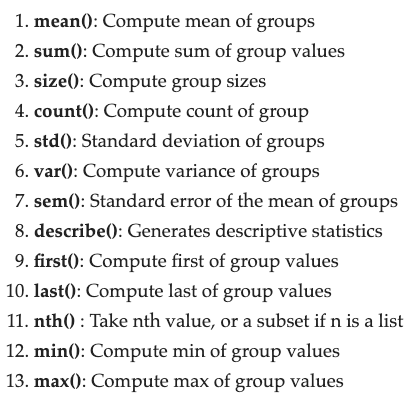

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
estatura,35901.0,1.639094,0.136044,0.3,1.62,1.64,1.7,2.04
edad,35901.0,30.549929,14.370017,1.0,21.00,28.00,38.0,103.00


## Automatización y APIs

Vamos a utilizar una API de geolocalización que a partir de una dirección nos regrese las coordenadas en valores de latitud y longitud. El registro de la dirección en donde se vio por última vez a una persona desaparecida es uno de los datos más importantes en nuestro conjunto, es por eso que contar con las coordenadas como columna en nuestro data frame es de gran importancia para un futuro análisis.

La API que usaremos es proporcionada por [Positionstack](https://positionstack.com/), es una API con un plan gratuito que nos permite realizar hasta 25 mil consultas por mes. Lo único que necesitamos es registrarnos en la página para obtener una API access key y poder empezar a realizar peticiones a la API.

Tenemos 25,000 peticiones por mes por lo que necesitamos 2 tokens para cubrir nuestro conjunto de datos.

In [57]:
df_respaldo = df.copy()

In [66]:
df = df_respaldo

### Nueva columna 'dirección'

Crearemos una nueva columna temporal con el nombre de dirección, esta columna contendrá el valor del nombre del municipio más el nombre del país (México en todos los casos) seguido de una coma. Este formato de dirección es con el que la petición a la API arroja con mayor precisión las coordenadas. 

Recordando que en la columna de 'municipio' mantuvimos la categoría `NO ESPECIFICADO` tenemos que buscar una alternativa para formar nuestro valor de dirección en estos casos, se tomó la decisión de usar el valor de la columna 'entidad' para completar el valor de la dirección y para que la API nos pueda regresar un resultado.


In [66]:
df['direccion'] = np.where(df['municipio']!= 'NO ESPECIFICADO', df['municipio'] + ', MÉXICO', df['entidad'] + ', MÉXICO')

In [67]:
df['direccion']

1                         NAVOJOA, MÉXICO
2                  VALLE DE BRAVO, MÉXICO
3                          CHALCO, MÉXICO
4             TLALNEPANTLA DE BAZ, MÉXICO
5                          TOLUCA, MÉXICO
                       ...               
35897                      PUEBLA, MÉXICO
35898            VILLA DE ALVAREZ, MÉXICO
35899                       CHILA, MÉXICO
35900            VILLA DE ALVAREZ, MÉXICO
35901    SAN NICOLAS DE LOS GARZA, MÉXICO
Name: direccion, Length: 35901, dtype: object

### Automatización de proceso de peticiones

La  [documentación oficial](https://positionstack.com/documentation)  de la API nos muestra la siguiente estructura de **request** para obtener valores de coordenadas: 

```console
// Forward Geocoding API Endpoint

http://api.positionstack.com/v1/forward
    ? access_key = YOUR_ACCESS_KEY
    & query = 1600 Pennsylvania Ave NW, Washington DC
```

A partir de esta información podemos definir los valores de nuestro endpoint y nuestro diccionario de parámetros. El valor de `query` debe ser nuestra llave de acceso proporcionada por la API, dejaremos vacío el valor de `query`, pues, este cambiará tomando el valor de cada dirección en nuestro proceso de automatización

In [68]:
endpoint = 'http://api.positionstack.com/v1/forward?'
payload = {'access_key': '', 'query': ''}

Creamos una lista vacía en donde se almacenaran los valores de longitud y latitud para cada valor de dirección.

In [69]:
coordenadas = []

**Dividir conjunto de datos**

Vamos a dividir nuestro conjunto en dos partes, pues como mencionamos, al necesitar dos llaves de acceso tenemos que realizar el proceso para cada llave.

In [70]:
df_parte_1 = df.loc[:20000]
df_parte_2 = df.loc[20001:]

In [71]:
df_parte_1

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen,direccion
1,2012-03-18,05:00:00,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.10,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NINGUNO,FGE - SONORA,"NAVOJOA, MÉXICO"
2,2007-02-05,02:00:26,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.10,DELGADA,MUJER,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,"VALLE DE BRAVO, MÉXICO"
3,2009-03-14,08:30:54,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.10,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NINGUNO,FGJ - ESTADO DE MEXICO,"CHALCO, MÉXICO"
4,2006-12-23,08:00:28,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.10,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NINGUNO,FGJ - ESTADO DE MEXICO,"TLALNEPANTLA DE BAZ, MÉXICO"
5,2008-01-11,12:00:17,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.10,DELGADA,HOMBRE,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,"TOLUCA, MÉXICO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2015-02-26,09:30:00,MICHOACAN,MORELIA,MORELIA,MEXICANA,1.85,MEDIANA,HOMBRE,34,TATUAJE EN SU ANTEBRAZO IZQUIERDO EN TINTA NEG...,NINGUNO,PGJ - MICHOACAN,"MORELIA, MÉXICO"
19997,2015-03-08,03:00:00,MICHOACAN,BUENAVISTA,FELIPE CARRILLO PUERTO,MEXICANA,1.68,DELGADA,HOMBRE,37,NO ESPECIFICADO,NINGUNO,PGJ - MICHOACAN,"BUENAVISTA, MÉXICO"
19998,2015-03-02,10:00:00,MICHOACAN,URUAPAN,URUAPAN,MEXICANA,1.65,DELGADA,HOMBRE,35,TATUAJE SOLO MENCIONA QUE SON EN EL PECHO SIN ...,NINGUNO,PGJ - MICHOACAN,"URUAPAN, MÉXICO"
19999,2015-02-16,04:00:00,MICHOACAN,TACAMBARO,TACAMBARO,MEXICANA,1.64,NO ESPECIFICADO,HOMBRE,19,NO ESPECIFICADO,NINGUNO,PGJ - MICHOACAN,"TACAMBARO, MÉXICO"


In [72]:
df_parte_2

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen,direccion
20001,2011-08-23,06:00:00,MICHOACAN,APATZINGAN,APATZINGAN,MEXICANA,1.70,DELGADA,HOMBRE,17,UN LUNAR A UN LADO DE LA CIEN DEL LADO DERECHO...,NINGUNO,PGJ - MICHOACAN,"APATZINGAN, MÉXICO"
20002,2012-01-05,12:50:00,MICHOACAN,APATZINGAN,APATZINGAN,MEXICANA,1.90,ROBUSTA,HOMBRE,34,"CON LAS LETRAS DE ""NENE"".",NINGUNO,PGJ - MICHOACAN,"APATZINGAN, MÉXICO"
20003,2012-07-31,12:00:00,TAMAULIPAS,REYNOSA,REYNOSA,MEXICANA,1.64,NO ESPECIFICADO,MUJER,29,NO ESPECIFICADO,NINGUNO,PGJ - TAMAULIPAS,"REYNOSA, MÉXICO"
20004,2015-03-09,03:30:00,MICHOACAN,SAHUAYO,SAHUAYO,MEXICANA,1.65,ROBUSTA,HOMBRE,43,"TRAE PUENTE EN LOS DIENTES DE ABAJO CENTRALES,...",NINGUNO,PGJ - MICHOACAN,"SAHUAYO, MÉXICO"
20005,2015-03-10,08:00:00,MICHOACAN,SAHUAYO,SAHUAYO,MEXICANA,1.62,DELGADA,MUJER,14,NO ESPECIFICADO,NINGUNO,PGJ - MICHOACAN,"SAHUAYO, MÉXICO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.60,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NINGUNO,FGE - PUEBLA,"PUEBLA, MÉXICO"
35898,2018-01-08,11:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.70,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NINGUNO,PGJ - COLIMA,"VILLA DE ALVAREZ, MÉXICO"
35899,2015-02-02,07:00:00,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA,"CHILA, MÉXICO"
35900,2017-08-22,04:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NINGUNO,PGJ - COLIMA,"VILLA DE ALVAREZ, MÉXICO"


**Usamos nuestra primera llave.**

In [73]:
payload['access_key'] = ''

El los siguientes ciclos `for` se llevará a cabo el proceso de automatización, vamos a iterar sobre cada elemento de la columna 'direcciones'. Describiremos los pasos en orden de ejecución:

* `payload['query']` = i: Definimos el valor que tendrá el valor 'query', el cual debe ser un string con la dirección que necesita la petición a la API.

* `r = requests.get(endpoint, params=payload)`:  Usamos método GET de requests para realizar la petición a nuestro endpoint y enviar los parámetros como información extra que la API necesita para validar nuestra petición.
* `json = r.json()`: Guardamos el json que obtenemos como respuesta por la API.

* `coordenadas.append(f"{json['data'][0]['latitude']}, {json['data'][0]['longitude']}")`: Analizando el json devuelto por la API, identificamos las llaves que necesitamos para acceder a los valores de longitud y latitud. Juntamos ambos valores en un string separándolos por una ','.

* `except`: Usamos una estructura try except para la ejecucion de las líneas anteriores. En caso de que algo falle en el proceso de petición, asignaremos un valor '0, 0' a nuestra lista.

In [74]:
if payload['access_key'] == '':
    print("Para ejecutar la automatización de las peticiones debes generar tus llaves de acceso, pero no te preocupes, el proceso ya ha sido ejecutado con llaves válidas.") 
    print("\nEn las celdas posteriores encontrarás la lectura del conjunto de datos con la columna de coordenadas obtenida por las peticiones a la API.")
else:
    for i in df_parte_1['direccion']:
        payload['query'] = i
        try:
            r = requests.get(endpoint, params=payload)
            if r.status_code == 200:
                json = r.json()
                coordenadas.append(f"{json['data'][0]['latitude']}, {json['data'][0]['longitude']}")
            else:
               coordenadas.append('0, 0') 
        except:
            coordenadas.append('0, 0')

**Usamos nuestra segunda llave**.

In [79]:
payload['access_key'] = ''

In [80]:
if payload['access_key'] == '':
    print("Para ejecutar la automatización de las peticiones debes generar tus llaves de acceso, pero no te preocupes, el proceso ya ha sido ejecutado con llaves válidas.") 
    print("\nEn las celdas posteriores encontrarás la lectura del conjunto de datos con la columna de coordenadas obtenida por las peticiones a la API.")
else:
    for i in df_parte_2['direccion']:
        payload['query'] = i
        try:
            r = requests.get(endpoint, params=payload)
            if r.status_code == 200:
                json = r.json()
                coordenadas.append(f"{json['data'][0]['latitude']}, {json['data'][0]['longitude']}")
            else:
               coordenadas.append('0, 0') 
        except:
            coordenadas.append('0, 0')

In [81]:
len(coordenadas)

35901

> El proceso de peticiones ha terminado y nuestra lista de coordenadas ya contiene los valores de longitud y latitud correspondientes a cada registro de nuestro dataframe.

Ya podemos eliminar nuestra columna temporal de dirección.

In [84]:
df = df.drop(columns=['direccion'])

### Nueva columna 'coordenadas'

Terminado el proceso, creamos la columna 'coordenadas' en nuestro data frame pasandole los valores de las coordenadas almacenados en nuestra lista.

In [86]:
try:
   df['coordenadas'] = coordenadas
   df.to_csv('RNPEDFC_API.csv', index=False, encoding='ISO-8859-1')
except:
    print("Para ejecutar la automatización de las peticiones debes generar tus llaves de acceso, pero no te preocupes, el proceso ya ha sido ejecutado con llaves válidas.") 
    print("\nEn las celdas posteriores encontrarás la lectura del conjunto de datos con la columna de coordenadas obtenida por las peticiones a la API.")


In [92]:
df = pd.read_csv('RNPEDFC_API.csv', encoding='ISO-8859-1')

In [93]:
df

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen,coordenadas
0,2012-03-18,05:00:00,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.10,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NINGUNO,FGE - SONORA,"27.069053, -109.439423"
1,2007-02-05,02:00:26,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.10,DELGADA,MUJER,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,"19.16368, -100.134684"
2,2009-03-14,08:30:54,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.10,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NINGUNO,FGJ - ESTADO DE MEXICO,"19.266337, -98.8978"
3,2006-12-23,08:00:28,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.10,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NINGUNO,FGJ - ESTADO DE MEXICO,"19.547512, -99.193851"
4,2008-01-11,12:00:17,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.10,DELGADA,HOMBRE,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,"18.078, -91.6552"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018-04-26,08:00:00,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.60,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NINGUNO,FGE - PUEBLA,"19.051201, -98.212116"
35897,2018-01-08,11:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.70,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NINGUNO,PGJ - COLIMA,"19.25, -103.73333"
35898,2015-02-02,07:00:00,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA,"17.965896, -97.864616"
35899,2017-08-22,04:00:00,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NINGUNO,PGJ - COLIMA,"19.25, -103.73333"


> Nuestro dataframe ahora contiene la columna de coordenadas correspondientes a cada registro del último lugar en donde se vio a la persona desaparecida

## Transformación, filtración y ordenamiento de datos


    - Checa que todos tus datos tengan el tipo de dato correcto. Si no es así, usa casting para convertir tus datos al tipo de dato correcto (recuerda que tipos de dato como datetime64 se guardan como strings cuando están en archivos .csv, así que tendrás que convertirlos al tipo de dato apropiado cada vez que importes tu archivo.)
    
    - Si tienes columnas de texto, asegúrate de que todas tengan el formato correcto. Si no es así, utiliza las técnicas de manipulación de strings para darles el formato que necesitas.
    
    - Si consideras que alguna de tus columnas sería más clara si los datos tuvieran otro formato o representación usa map para transformar los datos de esa columna.
    
    - Si crees que es posible generar nuevas columnas útiles a partir de las columnas que ya tienes, usa apply para generar nuevos datos a partir de los que tienes y añádelos a tu dataset.
    
    - Con el fin de responder algunas de las preguntas que te planteaste acerca de tu dataset, usa filtros y sorting para crear nuevos subconjuntos y reordenamientos que sean más adecuados para responder tus preguntas. Primero comienza intentando responder las preguntas que te planteaste al principio, pero después puedes solamente explorar para ver si encuentras otras preguntas que no te habías planteado anteriormente.


### Casting

Observemos nuevamente nuestras columnas y su tipo de dato.

In [59]:
df.dtypes

fecha                  object
hora                   object
entidad                object
municipio              object
localidad              object
nacionalidad           object
estatura              float64
complexion             object
sexo                   object
edad                    Int64
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object

> Ya realizamos el casting correspondiente en nuestras variables numéricas 'estatura' y 'edad' pero aún tenemos dos columnas que tienen un tipo de dato incorrecto. 

Usaremos el método `astype` y un diccionario de conversión para cambiar el tipo de datos de las columnas 'fecha' y 'hora'.

In [60]:
diccionario_de_conversion = {
    'fecha': 'datetime64',
    'hora': 'datetime64'
}

In [61]:
df = df.astype(diccionario_de_conversion)

In [62]:
df['fecha']

1       2012-03-18
2       2007-02-05
3       2009-03-14
4       2006-12-23
5       2008-01-11
           ...    
35897   2018-04-26
35898   2018-01-08
35899   2015-02-02
35900   2017-08-22
35901   2018-04-11
Name: fecha, Length: 35901, dtype: datetime64[ns]

In [63]:
df['hora']

1       2022-09-13 05:00:00
2       2022-09-13 02:00:26
3       2022-09-13 08:30:54
4       2022-09-13 08:00:28
5       2022-09-13 12:00:17
                ...        
35897   2022-09-13 08:00:00
35898   2022-09-13 11:00:00
35899   2022-09-13 07:00:00
35900   2022-09-13 04:00:00
35901   2022-09-13 02:00:00
Name: hora, Length: 35901, dtype: datetime64[ns]

> Las variables fecha y hora ya son de tipo `datetime64`, sin embargo, a los valores de hora se les ha agregado la fecha actual, debemos corregir esto.

Extraemos únicamente el registro del tiempo de la columna 'hora'.

In [64]:
df['hora'] = df['hora'].dt.time
df['hora']

1        05:00:00
2        02:00:26
3        08:30:54
4        08:00:28
5        12:00:17
           ...   
35897    08:00:00
35898    11:00:00
35899    07:00:00
35900    04:00:00
35901    02:00:00
Name: hora, Length: 35901, dtype: object

In [66]:
df.dtypes

fecha                 datetime64[ns]
hora                          object
entidad                       object
municipio                     object
localidad                     object
nacionalidad                  object
estatura                     float64
complexion                    object
sexo                          object
edad                           Int64
senas_particulares            object
discapacidad                  object
dependecia_origen             object
dtype: object

> Vemos que el formato de 'fecha' ahora aparece como `datetime64[ns]`, en el caso de la columna 'hora' lo sigue mostrando como object porque es una extracción de  `datetime64[ns]`.

### Manipulación de Strings

In [67]:
df.head(3)

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen
1,2012-03-18,05:00:00,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NINGUNO,FGE - SONORA
2,2007-02-05,02:00:26,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2009-03-14,08:30:54,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NINGUNO,FGJ - ESTADO DE MEXICO


Los textos de nuestras variables de tipo `string` están en mayúsculas. Vamos a modificar el patrón iniciando con mayúscula la primera letra de cada palabra.

In [68]:
columnas = ['entidad', 'municipio', 'localidad', 'nacionalidad', 'complexion', 'sexo', 'senas_particulares', 'discapacidad']

for col in columnas:
    df[col] = df[col].str.title()

En el caso de los valores de dependencia origen nos encontramos con las siglas de las dependencias, por lo tanto, debemos mantenerlas de esta forma. Podemos extraer las letras correspondientes a las siglas y aplicar `.str.title()` únicamente en el resto del texto.

In [69]:
df['dependecia_origen'] = df['dependecia_origen'].str[:6] + df['dependecia_origen'].str[6:].str.title()

In [70]:
df

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen
1,2012-03-18,05:00:00,Sonora,Navojoa,Navojoa,Mexicana,1.10,Delgada,Mujer,7,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
2,2007-02-05,02:00:26,Estado De Mexico,Valle De Bravo,Valle De Bravo,Mexicana,1.10,Delgada,Mujer,4,No Especificado,Ninguno,FGJ - Estado De Mexico
3,2009-03-14,08:30:54,Estado De Mexico,Chalco,Chalco,Mexicana,1.10,Delgada,Hombre,6,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
4,2006-12-23,08:00:28,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,Mexicana,1.10,Delgada,Hombre,10,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
5,2008-01-11,12:00:17,Estado De Mexico,Toluca,Toluca,Mexicana,1.10,Delgada,Hombre,4,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,Puebla,Puebla,Puebla,Mexicana,1.60,Delgada,Hombre,22,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35898,2018-01-08,11:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.70,Robusta,Mujer,27,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35899,2015-02-02,07:00:00,Puebla,Chila,Chilas De Las Flores,Mexicana,1.77,Mediana,Mujer,86,No Especificado,Ninguno,FGE - Puebla
35900,2017-08-22,04:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.76,Robusta,Hombre,41,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


In [86]:
df.groupby(['entidad'], sort=False).size().reset_index(name='total')

,entidad,total
0,Sonora,2150
1,Estado De Mexico,3890
2,Chihuahua,2181
3,Tlaxcala,24
4,Colima,592
5,Morelos,239
6,Hidalgo,145
7,Durango,415
8,Queretaro,283
9,Guanajuato,615


In [85]:
df.groupby(['entidad', 'municipio'], sort=False).size().reset_index(name='total')

,entidad,municipio,total
0,Sonora,Navojoa,76
1,Estado De Mexico,Valle De Bravo,30
2,Estado De Mexico,Chalco,129
3,Estado De Mexico,Tlalnepantla De Baz,88
4,Estado De Mexico,Toluca,346
...,...,...,...
1159,Puebla,Piaxtla,1
1160,Puebla,Petlalcingo,1
1161,Yucatan,Chemax,1
1162,Nuevo Leon,Mina,1


In [84]:
df.groupby(['entidad', 'municipio', 'localidad'], sort=False).size().reset_index(name='total')

,entidad,municipio,localidad,total
0,Sonora,Navojoa,Navojoa,68
1,Estado De Mexico,Valle De Bravo,Valle De Bravo,25
2,Estado De Mexico,Chalco,Chalco,124
3,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,82
4,Estado De Mexico,Toluca,Toluca,312
...,...,...,...,...
3558,Nuevo Leon,Mina,Mina,1
3559,Nuevo Leon,Monterrey,Montyerrey,1
3560,Puebla,Puebla,San Hipolito Xochiltenango,1
3561,Sonora,Cajeme,Obregon,1


In [83]:
df.groupby(['nacionalidad'], sort=False).size().reset_index(name='total')

,nacionalidad,total
0,Mexicana,33667
1,Estadounidense,123
2,No Especificado,2027
3,Alemana,1
4,Colombiana,9
5,Eritrea,1
6,Nicaraguense,1
7,Cubana,3
8,Hondureña,24
9,Guatemalteco,11


In [82]:
df.groupby(['sexo'], sort=False).size().reset_index(name='total')

,sexo,total
0,Mujer,9226
1,Hombre,26675


In [81]:
df.groupby(['sexo', 'edad'], sort=True).size().reset_index(name='total')

,sexo,edad,total
0,Hombre,1,77
1,Hombre,2,64
2,Hombre,3,74
3,Hombre,4,56
4,Hombre,5,43
...,...,...,...
188,Mujer,90,3
189,Mujer,91,3
190,Mujer,93,3
191,Mujer,96,1


In [150]:
df['edad'].dtypes

Int64Dtype()

In [117]:
test = {
    'Mayor de edad': (df['edad'] >= 18).sum(),
    'Menor de edad': (df['edad'] < 18).sum()
}

In [119]:
pd.DataFrame(test, index=[1])

,Mayor de edad,Menor de edad
1,29466,6435


In [104]:
df.groupby('sexo')[['edad', 'entidad']].agg(pd.Series.mode)

,edad,entidad
sexo,,
Hombre,28,Tamaulipas
Mujer,28,Estado De Mexico


In [105]:
df.groupby(['discapacidad'], sort=False).size().reset_index(name='total')

,discapacidad,total
0,Ninguno,34843
1,No Especificado,1043
2,Autismo,7
3,Sindrome De Down,8


Las cifras presentan el total de registros de personas relacionadas con averiguaciones previas, carpetas de investigación o actas circunstanciadas del fuero común que permanecen sin localizar al corte del 30 de abril del 2018 (ver nota metodológica), distribuidas por año.

In [145]:
def dias_desaparecidos(value):
    as_datetime = pd.to_datetime(value, unit='ms')
    ultima_fecha = pd.to_datetime('2018-04-30')
    dias_diferencia = (ultima_fecha - as_datetime).days
    return dias_diferencia

In [147]:
df['dias_desaparecido'] = df['fecha'].apply(dias_desaparecidos)

In [148]:
df

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen,anio,dias_desaparecido
1,2012-03-18,05:00:00,Sonora,Navojoa,Navojoa,Mexicana,1.10,Delgada,Mujer,7,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora,2012,2234
2,2007-02-05,02:00:26,Estado De Mexico,Valle De Bravo,Valle De Bravo,Mexicana,1.10,Delgada,Mujer,4,No Especificado,Ninguno,FGJ - Estado De Mexico,2007,4102
3,2009-03-14,08:30:54,Estado De Mexico,Chalco,Chalco,Mexicana,1.10,Delgada,Hombre,6,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico,2009,3334
4,2006-12-23,08:00:28,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,Mexicana,1.10,Delgada,Hombre,10,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico,2006,4146
5,2008-01-11,12:00:17,Estado De Mexico,Toluca,Toluca,Mexicana,1.10,Delgada,Hombre,4,No Especificado,Ninguno,FGJ - Estado De Mexico,2008,3762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,Puebla,Puebla,Puebla,Mexicana,1.60,Delgada,Hombre,22,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla,2018,4
35898,2018-01-08,11:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.70,Robusta,Mujer,27,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima,2018,112
35899,2015-02-02,07:00:00,Puebla,Chila,Chilas De Las Flores,Mexicana,1.77,Mediana,Mujer,86,No Especificado,Ninguno,FGE - Puebla,2015,1183
35900,2017-08-22,04:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.76,Robusta,Hombre,41,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima,2017,251


Columna de año

In [123]:
df['anio'] = df['fecha'].dt.year

In [124]:
df

,fecha,hora,entidad,municipio,localidad,nacionalidad,estatura,complexion,sexo,edad,senas_particulares,discapacidad,dependecia_origen,anio
1,2012-03-18,05:00:00,Sonora,Navojoa,Navojoa,Mexicana,1.10,Delgada,Mujer,7,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora,2012
2,2007-02-05,02:00:26,Estado De Mexico,Valle De Bravo,Valle De Bravo,Mexicana,1.10,Delgada,Mujer,4,No Especificado,Ninguno,FGJ - Estado De Mexico,2007
3,2009-03-14,08:30:54,Estado De Mexico,Chalco,Chalco,Mexicana,1.10,Delgada,Hombre,6,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico,2009
4,2006-12-23,08:00:28,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,Mexicana,1.10,Delgada,Hombre,10,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico,2006
5,2008-01-11,12:00:17,Estado De Mexico,Toluca,Toluca,Mexicana,1.10,Delgada,Hombre,4,No Especificado,Ninguno,FGJ - Estado De Mexico,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,2018-04-26,08:00:00,Puebla,Puebla,Puebla,Mexicana,1.60,Delgada,Hombre,22,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla,2018
35898,2018-01-08,11:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.70,Robusta,Mujer,27,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima,2018
35899,2015-02-02,07:00:00,Puebla,Chila,Chilas De Las Flores,Mexicana,1.77,Mediana,Mujer,86,No Especificado,Ninguno,FGE - Puebla,2015
35900,2017-08-22,04:00:00,Colima,Villa De Alvarez,Villa De Alvarez,Mexicana,1.76,Robusta,Hombre,41,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima,2017


In [126]:
df.groupby(['anio'], sort=True).size().reset_index(name='total')

,anio,total
0,1968,1
1,1971,1
2,1972,1
3,1976,1
4,1977,2
5,1978,1
6,1979,3
7,1980,1
8,1984,1
9,1985,2


In [ ]:
df

EXPORTAR CSV